**Imports**

In [1]:
# Imports:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


**Lengthy objects**

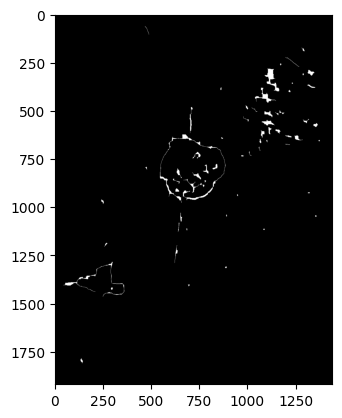

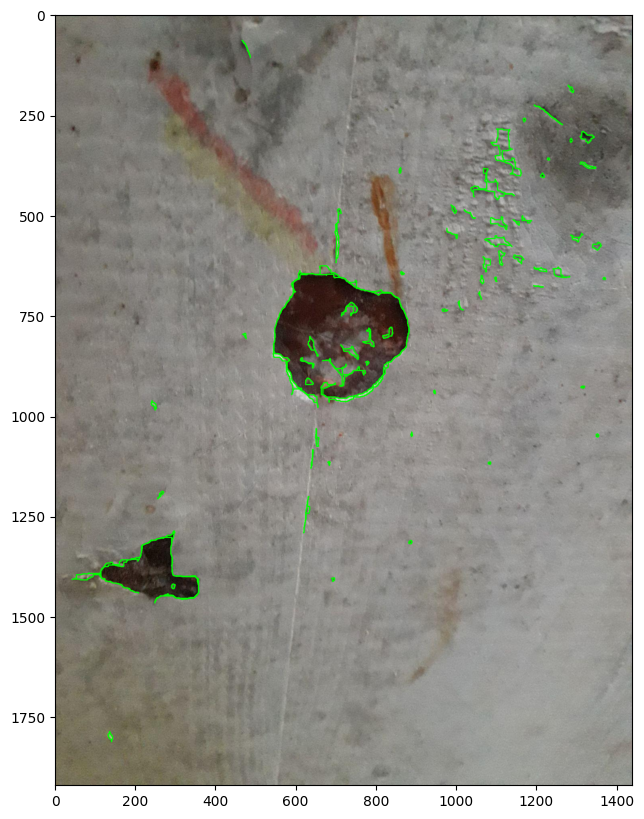

C:\Users\koeni\AppData\Local\Temp\ipykernel_44256\3209686449.py:42: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(box)


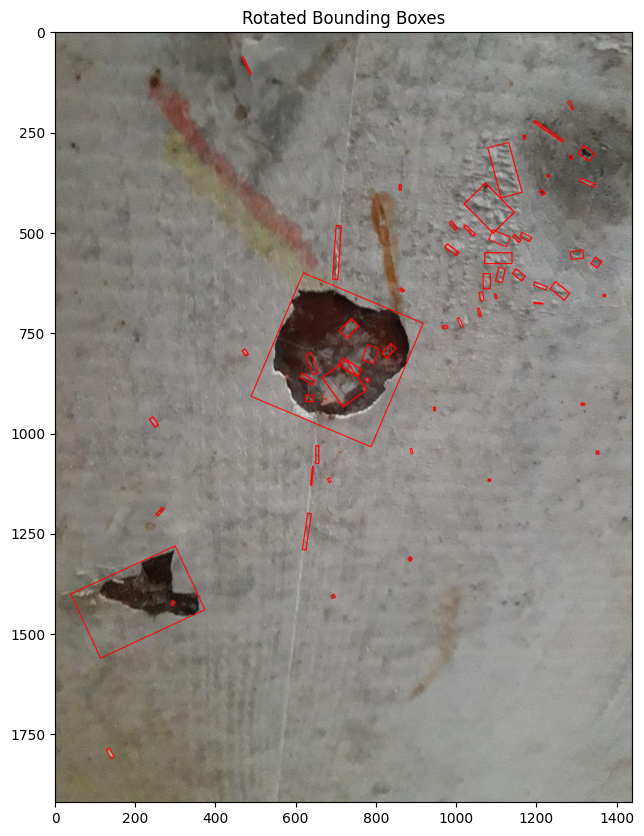

[2.7322832649590927,
 1.4230768873871835,
 1.1406249552406178,
 1.2399999367312025,
 1.6260044702331773,
 10.199187221563706,
 3.666666973869624,
 1.0,
 1.939999870382092,
 18.034484534065047,
 1.3333333333333333,
 2.8235295478235307,
 5.5,
 2.445859771061694,
 2.25,
 1.8,
 1.1875,
 1.1111110733879783,
 1.2304012186884847,
 3.3709676455895563,
 2.747239253016817,
 3.499999780410413,
 2.048077090374788,
 1.2971799849455188,
 1.951690986347308,
 2.3333333333333335,
 1.5384615810240376,
 4.38235296111296,
 4.285714512315732,
 10.749998840961842,
 1.2,
 2.5217395900571296,
 2.5999998607766206,
 1.66666661208696,
 2.0776696712377416,
 3.8606554405208473,
 1.029914500175852,
 2.111111111111111,
 1.8933334350585938,
 2.051948046016229,
 1.036363591163545,
 2.5185185185185186,
 1.5602966655597776,
 3.585271343172099,
 2.92617438735182,
 1.7992425162950723,
 2.298611143958418,
 5.885713957606883,
 10.362637335158462,
 3.000000122265935,
 1.3409091918921645,
 1.3969564947018338,
 2.8,
 4.4897959

In [61]:
# Read in image:
path = "data/dacl10k_v2_devphase/images/train/"
file = "dacl10k_v2_train_0045.jpg"
image_path = path + file
image = cv2.imread(image_path, cv2.IMREAD_COLOR)
gray_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Blur image:
gray_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Apply edge detector:
edges = cv2.Canny(gray_image, 50, 150)

# Apply morphological operations 
kernel = np.ones((15, 15), np.uint8)
edges = cv2.dilate(edges, kernel, iterations=1)
edges = cv2.erode(edges, kernel, iterations=1)

## Display
plt.imshow(edges, cmap='gray')
plt.show()

# Find contours
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

## Display
image_contours = image.copy()
plt.figure(figsize=(10, 10))
cv2.drawContours(image_contours, contours, -1, (0, 255, 0), 2)
plt.imshow(cv2.cvtColor(image_contours, cv2.COLOR_BGR2RGB))
plt.show()

# Extract characteristics per contour:
characteristics = []
image_boxes = image.copy()

for contour in contours:

    # Get fitted bounding box
    rect = cv2.minAreaRect(contour)
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    width = rect[1][0]
    height = rect[1][1]
    
    # Calculate aspect ratio
    aspect_ratio = float(max(width, height)) / min(width, height)
    characteristics.append(aspect_ratio)

    cv2.drawContours(image_boxes, [box], 0, (0, 0, 255), 2)


plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image_boxes, cv2.COLOR_BGR2RGB))
plt.title('Rotated Bounding Boxes')
plt.show()

characteristics